### Libraries

In [3]:
%pip install scikit-image 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier

import skimage

import tensorflow as tf
import tf_keras

### Import data

In [12]:
from matplotlib import pyplot as plt


img=plt.imread('dataset\Panda\Panda_4_1.jpg')
img.shape

(224, 224, 3)

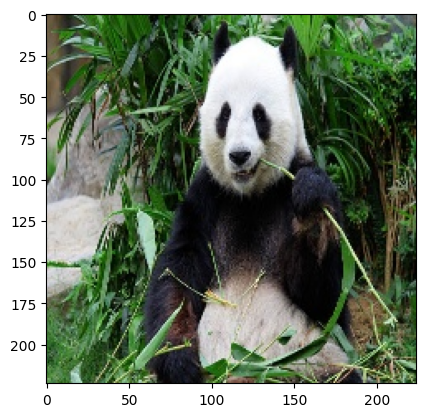

In [13]:
plt.imshow(img)

In [14]:
data=os.listdir('dataset')
img_list=[]
label_list=[]
for folder in data:
    for file in os.listdir('dataset/'+folder):
        if os.path.isfile('dataset/'+folder+'/'+file):
            img=plt.imread('dataset/'+folder+'/'+file)
            label_list.append(folder)
            img_list.append(img)

In [15]:
df=pd.DataFrame(data={"img":img_list,"label":label_list})
df.head()

,img,label
0,"[[[159, 178, 132], [158, 177, 131], [162, 184,...",Bear
1,"[[[156, 169, 159], [154, 168, 155], [156, 169,...",Bear
2,"[[[241, 242, 247], [241, 242, 247], [241, 242,...",Bear
3,"[[[143, 154, 140], [141, 152, 138], [138, 150,...",Bear
4,"[[[26, 28, 25], [25, 27, 24], [24, 26, 23], [2...",Bear


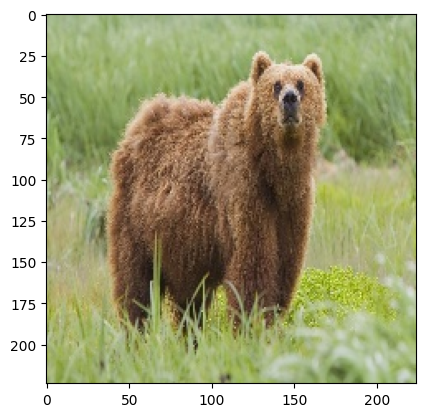

In [16]:
plt.imshow(df.loc[0,'img'])

In [17]:
i=0
for word in df['label']:
    df.iloc[i,1]=word.replace('Head','')
    i+=1

In [18]:
df.label.unique()

array(['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant',
       'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra'],
      dtype=object)

In [19]:
df.shape

(1944, 2)

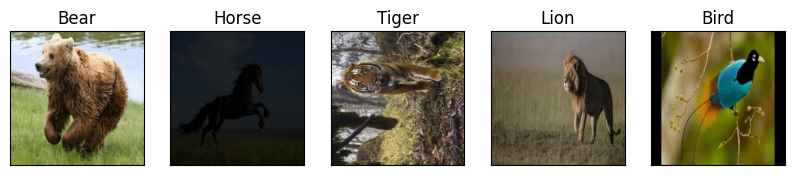

In [20]:
fig,ax=plt.subplots(1,5,figsize=(10,4))
for i in range(5):
    j=np.random.randint(0,df.shape[0])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,5,i+1)
    plt.imshow(df.loc[j,'img'])
    plt.title(df.loc[j,'label'])

In [21]:
with open('pickle_files/dataframe.pkl','wb') as f:
    pickle.dump(df,f)

### Model

In [22]:
df.head()

,img,label
0,"[[[159, 178, 132], [158, 177, 131], [162, 184,...",Bear
1,"[[[156, 169, 159], [154, 168, 155], [156, 169,...",Bear
2,"[[[241, 242, 247], [241, 242, 247], [241, 242,...",Bear
3,"[[[143, 154, 140], [141, 152, 138], [138, 150,...",Bear
4,"[[[26, 28, 25], [25, 27, 24], [24, 26, 23], [2...",Bear


In [23]:
dict_labels={}
i=0
for label in df.label.unique():
    dict_labels[label]=i
    i+=1
print(dict_labels)

{'Bear': 0, 'Bird': 1, 'Cat': 2, 'Cow': 3, 'Deer': 4, 'Dog': 5, 'Dolphin': 6, 'Elephant': 7, 'Giraffe': 8, 'Horse': 9, 'Kangaroo': 10, 'Lion': 11, 'Panda': 12, 'Tiger': 13, 'Zebra': 14}


In [24]:
map={}
for key in dict_labels.keys():
    map[dict_labels[key]]=key
print(map)

{0: 'Bear', 1: 'Bird', 2: 'Cat', 3: 'Cow', 4: 'Deer', 5: 'Dog', 6: 'Dolphin', 7: 'Elephant', 8: 'Giraffe', 9: 'Horse', 10: 'Kangaroo', 11: 'Lion', 12: 'Panda', 13: 'Tiger', 14: 'Zebra'}


In [25]:
with open('pickle_files/map.pkl','wb') as f:
    pickle.dump(map,f)

In [26]:
df["label_2"]=0

In [27]:
for i in range(df.shape[0]):
    df.iloc[i,2]=dict_labels[df.iloc[i,1]]
df.sample(5)

,img,label,label_2
1021,"[[[5, 6, 8], [7, 8, 10], [12, 13, 15], [16, 17...",Elephant,7
48,"[[[194, 199, 195], [205, 210, 206], [205, 210,...",Bear,0
1159,"[[[53, 55, 34], [50, 51, 33], [39, 41, 27], [3...",Horse,9
18,"[[[105, 138, 107], [105, 138, 107], [107, 140,...",Bear,0
1831,"[[[61, 70, 69], [61, 70, 69], [60, 69, 68], [6...",Zebra,14


In [28]:
df.head()


,img,label,label_2
0,"[[[159, 178, 132], [158, 177, 131], [162, 184,...",Bear,0
1,"[[[156, 169, 159], [154, 168, 155], [156, 169,...",Bear,0
2,"[[[241, 242, 247], [241, 242, 247], [241, 242,...",Bear,0
3,"[[[143, 154, 140], [141, 152, 138], [138, 150,...",Bear,0
4,"[[[26, 28, 25], [25, 27, 24], [24, 26, 23], [2...",Bear,0


In [29]:
df["label"]=df["label_2"]
df.drop(columns=["label_2"],inplace=True)
df.sample(5)

,img,label
379,"[[[32, 32, 32], [32, 32, 32], [32, 32, 32], [3...",2
993,"[[[169, 213, 252], [170, 214, 253], [168, 212,...",7
1462,"[[[87, 113, 40], [99, 125, 52], [94, 121, 50],...",11
99,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
726,"[[[5, 7, 6], [2, 4, 3], [6, 8, 7], [3, 5, 4], ...",5


In [30]:
df.head()

,img,label
0,"[[[159, 178, 132], [158, 177, 131], [162, 184,...",0
1,"[[[156, 169, 159], [154, 168, 155], [156, 169,...",0
2,"[[[241, 242, 247], [241, 242, 247], [241, 242,...",0
3,"[[[143, 154, 140], [141, 152, 138], [138, 150,...",0
4,"[[[26, 28, 25], [25, 27, 24], [24, 26, 23], [2...",0


In [31]:
x_train,x_test,y_train,y_test=train_test_split(df['img'],df['label'],test_size=0.2,random_state=42)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1555,), (389,), (1555,), (389,))

In [33]:
x_train=np.array(x_train.tolist())
x_test=np.array(x_test.tolist())
x_train.shape,x_test.shape

((1555, 224, 224, 3), (389, 224, 224, 3))

In [34]:
y_train

1596    12
862      6
534      4
1645    12
1423    11
        ..
1130     8
1294    10
860      6
1459    11
1126     8
Name: label, Length: 1555, dtype: int64

In [35]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)
type(y_train),type(y_test)

(numpy.ndarray, numpy.ndarray)

In [36]:
x_train=np.array(x_train/255)
x_test=np.array(x_test/255)
type(x_train),type(x_test)

(numpy.ndarray, numpy.ndarray)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1555, 224, 224, 3), (389, 224, 224, 3), (1555,), (389,))

#### First neural network (linear regression)

In [ ]:
layers=[]
layers.append(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
layers.append(tf.keras.layers.Dense(20,activation='softmax'))

model=tf.keras.Sequential(layers)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# history = model.fit(x_train,y_train,epochs=30, use_multiprocessing=False, verbose=False, validation_data=(x_test, y_test))
history = model.fit(x_train,y_train,epochs=30, verbose=False, validation_data=(x_test, y_test))
print('Training Accuracy: {:.4f}'.format(model.evaluate(x_train,y_train)[1]))

49/49 [==============================] - 0s 5ms/step - loss: 1.3558 - accuracy: 0.8527
Training Accuracy: 0.8527


In [42]:
def training_plot( metrics, history):
    plt.figure(figsize=(10,3))
    for i,metric in enumerate(metrics):
        plt.subplot(1,2,i+1)
        y = history.history[metric]
        x = [ x+1 for x in range( len( history.history[metric] ))]
        plt.plot(x,y)
        y = history.history[f'val_{metric}']
        x = [ x+1 for x in range( len( history.history[f'val_{metric}'] ))]
        plt.plot(x,y)
        plt.title(metric)
        plt.legend([f'{metric}',f'val_{metric}'])

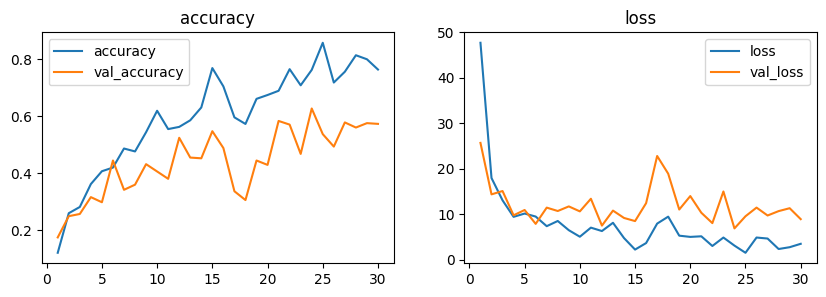

In [ ]:
training_plot(['accuracy','loss'],history)

#### New Neural Network

In [63]:
layers=[]
layers.append(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
layers.append(tf.keras.layers.Dense(1500,activation='relu'))
layers.append(tf.keras.layers.Dropout(0.2))
layers.append(tf.keras.layers.Dense(20,activation='softmax'))

model=tf.keras.Sequential(layers)

In [64]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
# history = model.fit(x_train,y_train,epochs=10, use_multiprocessing=False, validation_data=(x_test, y_test), batch_size=128)
history = model.fit(x_train,y_train,epochs=10, validation_data=(x_test, y_test), batch_size=128)
print('Training Accuracy: {:.4f}'.format(model.evaluate(x_train,y_train)[1]))

Epoch 1/10
13/13 [==============================] - 20s 1s/step - loss: 2.2035 - accuracy: 0.3685 - val_loss: 2.3061 - val_accuracy: 0.3625
Epoch 2/10
13/13 [==============================] - 17s 1s/step - loss: 2.1774 - accuracy: 0.3865 - val_loss: 2.3157 - val_accuracy: 0.3470
Epoch 3/10
13/13 [==============================] - 17s 1s/step - loss: 2.1156 - accuracy: 0.3987 - val_loss: 2.3243 - val_accuracy: 0.3625
Epoch 4/10
13/13 [==============================] - 16s 1s/step - loss: 2.1105 - accuracy: 0.4051 - val_loss: 2.3374 - val_accuracy: 0.3702
Epoch 5/10
13/13 [==============================] - 17s 1s/step - loss: 2.0880 - accuracy: 0.4084 - val_loss: 2.3669 - val_accuracy: 0.3342
Epoch 6/10
13/13 [==============================] - 17s 1s/step - loss: 2.0908 - accuracy: 0.4232 - val_loss: 2.2740 - val_accuracy: 0.3933
Epoch 7/10
13/13 [==============================] - 17s 1s/step - loss: 2.0208 - accuracy: 0.4386 - val_loss: 2.2776 - val_accuracy: 0.3907
Epoch 8/10
13/13 [==

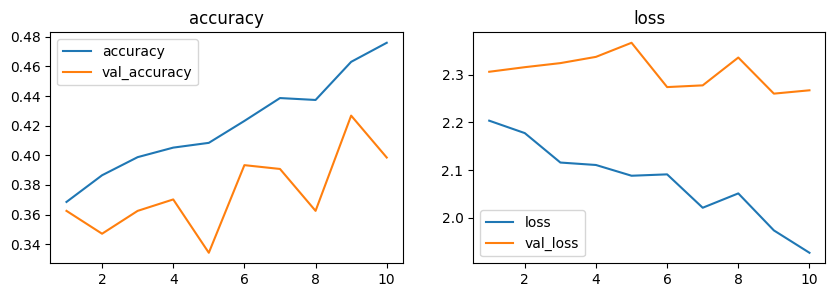

In [67]:
training_plot(['accuracy','loss'],history)

#### Deep neural network (more than one hidden layer)

In [68]:
layers=[]
layers.append(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
layers.append(tf.keras.layers.Dense(1500,activation='relu'))
layers.append(tf.keras.layers.Dropout(0.2))
layers.append(tf.keras.layers.Dense(1000,activation='relu'))
layers.append(tf.keras.layers.Dropout(0.2))
layers.append(tf.keras.layers.Dense(20,activation='softmax'))

model=tf.keras.Sequential(layers)

In [69]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [70]:
# history = model.fit(x_train,y_train,epochs=20, use_multiprocessing=False, validation_data=(x_test, y_test), batch_size=128)
history = model.fit(x_train,y_train,epochs=30, validation_data=(x_test, y_test), batch_size=128)
print('Training Accuracy: {:.4f}'.format(model.evaluate(x_train,y_train)[1]))

Epoch 1/30
13/13 [==============================] - 29s 2s/step - loss: 11.9333 - accuracy: 0.0701 - val_loss: 6.1021 - val_accuracy: 0.0514
Epoch 2/30
13/13 [==============================] - 19s 1s/step - loss: 5.9962 - accuracy: 0.1125 - val_loss: 2.9338 - val_accuracy: 0.1542
Epoch 3/30
13/13 [==============================] - 17s 1s/step - loss: 3.4623 - accuracy: 0.1428 - val_loss: 2.6872 - val_accuracy: 0.2057
Epoch 4/30
13/13 [==============================] - 18s 1s/step - loss: 2.7182 - accuracy: 0.1865 - val_loss: 2.5736 - val_accuracy: 0.2159
Epoch 5/30
13/13 [==============================] - 17s 1s/step - loss: 2.6341 - accuracy: 0.1923 - val_loss: 2.5550 - val_accuracy: 0.1979
Epoch 6/30
13/13 [==============================] - 17s 1s/step - loss: 2.5633 - accuracy: 0.2109 - val_loss: 2.5413 - val_accuracy: 0.2108
Epoch 7/30
13/13 [==============================] - 17s 1s/step - loss: 2.5086 - accuracy: 0.2251 - val_loss: 2.5299 - val_accuracy: 0.2288
Epoch 8/30
13/13 [=

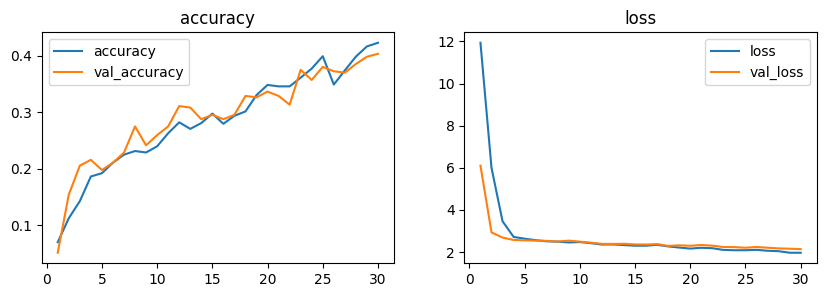

In [71]:
training_plot(['accuracy','loss'],history)

#### Convolutional neural network

In [38]:
layers=[]

layers.append(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
layers.append(tf.keras.layers.MaxPooling2D((2,2)))
layers.append(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
layers.append(tf.keras.layers.MaxPooling2D((2,2)))

layers.append(tf.keras.layers.Flatten())
layers.append(tf.keras.layers.Dense(1500,activation='relu'))
layers.append(tf.keras.layers.Dropout(0.2))
layers.append(tf.keras.layers.Dense(1000,activation='relu'))
layers.append(tf.keras.layers.Dropout(0.2))
layers.append(tf.keras.layers.Dense(20,activation='softmax'))

model=tf.keras.Sequential(layers)

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
# history = model.fit(x_train,y_train,epochs=30, use_multiprocessing=False, validation_data=(x_test, y_test), batch_size=128)
history = model.fit(x_train,y_train,epochs=30, validation_data=(x_test, y_test), batch_size=128)
print('Training Accuracy: {:.4f}'.format(model.evaluate(x_train,y_train)[1]))

Epoch 1/30
13/13 [==============================] - 70s 5s/step - loss: 3.5450 - accuracy: 0.0836 - val_loss: 2.8509 - val_accuracy: 0.1285
Epoch 2/30
13/13 [==============================] - 58s 4s/step - loss: 2.7374 - accuracy: 0.1717 - val_loss: 2.5412 - val_accuracy: 0.2262
Epoch 3/30
13/13 [==============================] - 57s 4s/step - loss: 2.4544 - accuracy: 0.2463 - val_loss: 2.3685 - val_accuracy: 0.2442
Epoch 4/30
13/13 [==============================] - 53s 4s/step - loss: 2.2419 - accuracy: 0.3113 - val_loss: 2.2078 - val_accuracy: 0.3239
Epoch 5/30
13/13 [==============================] - 55s 4s/step - loss: 2.0261 - accuracy: 0.3891 - val_loss: 2.0898 - val_accuracy: 0.3805
Epoch 6/30
13/13 [==============================] - 55s 4s/step - loss: 1.8707 - accuracy: 0.4502 - val_loss: 2.0417 - val_accuracy: 0.3830
Epoch 7/30
13/13 [==============================] - 55s 4s/step - loss: 1.6765 - accuracy: 0.5215 - val_loss: 1.9403 - val_accuracy: 0.4370
Epoch 8/30
13/13 [==

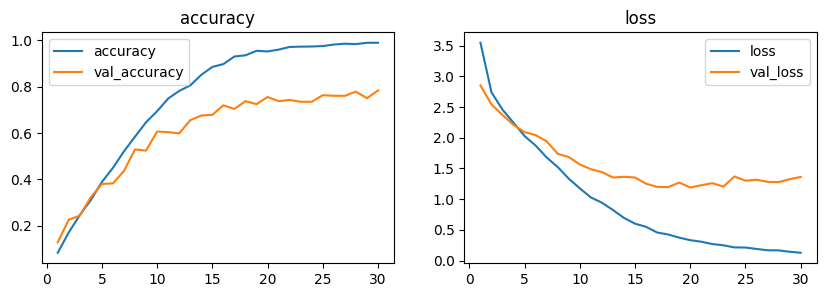

In [43]:
training_plot(['accuracy','loss'],history)

In [44]:
model.save('model/model.h5')

C:\Users\Vaibhav Tandon\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Testing

In [45]:
predictions=model.predict(x_test)

13/13 [==============================] - 3s 200ms/step


In [46]:
predictions.shape

(389, 20)

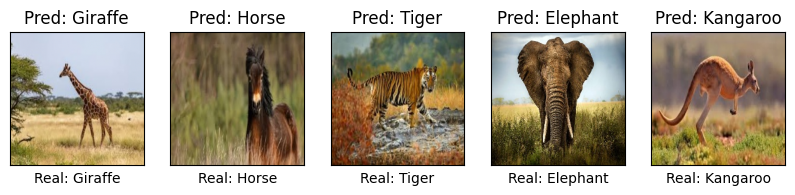

In [52]:
fig,ax=plt.subplots(1,5,figsize=(10,4))
for i in range(5):
    j=np.random.randint(0,x_test.shape[0])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[j])
    plt.title(f'Pred: {map[np.argmax(predictions[j])]}')
    plt.xlabel(f'Real: {map[y_test[j]]}')
plt.show()

In [53]:
print(f'Accuracy: {np.sum(np.argmax(predictions,axis=1)==y_test)/y_test.shape[0]}')
print(f'Error: {np.sum(np.argmax(predictions,axis=1)!=y_test)/y_test.shape[0]}')

Accuracy: 0.7840616966580977
Error: 0.2159383033419023


In [54]:
df_pred=pd.DataFrame(data={'pred':np.argmax(predictions,axis=1),'real':y_test})
df_pred.head()

,pred,real
0,12,12
1,2,10
2,13,13
3,8,8
4,2,2


In [55]:
df_pred["real"]=df_pred["real"].apply(lambda x: map[x])
df_pred["pred"]=df_pred["pred"].apply(lambda x: map[x])

In [56]:
df_pred.head()

,pred,real
0,Panda,Panda
1,Cat,Kangaroo
2,Tiger,Tiger
3,Giraffe,Giraffe
4,Cat,Cat


In [ ]:
df_pred["exito"]=(df_pred["real"]==df_pred["pred"]).astype(int)

In [58]:
df_pred.exito.value_counts()

exito
1    305
0     84
Name: count, dtype: int64

In [59]:
pd.crosstab(df_pred['real'],df_pred['pred'],margins=True)

pred,Bear,Bird,Cat,Cow,Deer,Dog,Dolphin,Elephant,Giraffe,Horse,Kangaroo,Lion,Panda,Tiger,Zebra,All
real,,,,,,,,,,,,,,,,
Bear,21,3,0,1,0,0,0,1,0,0,0,1,0,0,0,27
Bird,0,19,4,1,0,0,1,1,0,0,0,0,0,0,0,26
Cat,1,0,26,0,0,0,0,0,1,0,0,0,0,0,1,29
Cow,1,2,0,20,1,0,0,0,0,0,0,1,0,0,0,25
Deer,1,0,1,0,25,0,0,1,2,0,0,1,0,2,0,33
Dog,2,2,3,0,0,9,0,0,0,0,0,2,1,0,0,19
Dolphin,0,0,0,0,1,0,18,0,0,0,0,0,0,0,0,19
Elephant,1,0,0,1,0,0,0,21,1,0,0,1,0,1,0,26
Giraffe,2,0,0,0,0,0,0,0,14,0,0,0,0,0,0,16


In [60]:
import sklearn.metrics as metrics

In [61]:
pd.DataFrame(metrics.classification_report(df_pred['real'],df_pred['pred'],output_dict=True)).T.sort_values(by='f1-score',ascending=False)

,precision,recall,f1-score,support
Dolphin,0.947368,0.947368,0.947368,19.000000
Panda,0.870968,0.843750,0.857143,32.000000
Zebra,0.896552,0.812500,0.852459,32.000000
Tiger,0.750000,0.913043,0.823529,23.000000
Cow,0.833333,0.800000,0.816327,25.000000
Deer,0.862069,0.757576,0.806452,33.000000
Kangaroo,0.857143,0.750000,0.800000,24.000000
weighted avg,0.804072,0.784062,0.784130,389.000000
accuracy,0.784062,0.784062,0.784062,0.784062
Horse,1.000000,0.642857,0.782609,28.000000


In [67]:
def model_pipeline(file_path,mapping,model):
    img_path=file_path
    img=plt.imread(img_path)
    img=skimage.transform.resize(img,(80,80,3))
    img=np.array(img)
    predict=model.predict(img.reshape(1,80,80,3),verbose=False)
    results_s=(pd.Series(predict[0],index=[mapping[i] for i in range(20)]).sort_values(ascending=False)[:5]*100).to_dict()
    for key in results_s:
        results_s[key]=round(results_s[key],2)
    return results_s

In [ ]:
model_pipeline('Images/eagle.jpg',map,model)

### Transfer Learning

In [5]:
IMG_WEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
def read_and_decode(filename, reshape_dims):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img,channels = IMG_CHANNELS)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img,reshape_dims)

In [6]:
file_list = ['dataset/' + path + '/' + file for path in os.listdir('dataset') for file in os.listdir ('dataset/' + path)]
len(file_list)

1944

In [7]:
img = read_and_decode(file_list[0], [IMG_WEIGHT, IMG_WIDTH])
img.shape

TensorShape([224, 224, 3])

In [8]:
img_tf = [read_and_decode(file, [IMG_WEIGHT, IMG_WIDTH]) for file in file_list]
img_np = np.array(img_tf)
img_np.shape

(1944, 224, 224, 3)

In [9]:
target = [img[img.find('/') + 1 : img.rfind('/') - 4] for img in file_list]
len(target)

1944

In [10]:
x = img_np
y = target

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [12]:
encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [13]:
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(10, 3))
    for idx, metric in enumerate(['loss', 'accuracy']):
        ax[idx].plot([x for x in range(1, len(history.history[metric]) + 1)], history.history[metric])
        ax[idx].plot([x for x in range(1, len(history.history[f'val_{metric}']) + 1)], history.history[f'val_{metric}'])
        ax[idx].legend([metric, f'val_{metric}'],fontsize=9)

In [27]:
import tensorflow as tf
import tensorflow_hub as hub
from keras.saving import register_keras_serializable

@register_keras_serializable()
# Force KerasLayer to be recognized as tf.keras.Layer
class TFKerasLayer(tf.keras.layers.Layer):
    def __init__(self, handle, **kwargs):
        super().__init__()
        self._layer = hub.KerasLayer(handle, **kwargs)

    def call(self, inputs):
        return self._layer(inputs)

# Now build the model safely
model = tf.keras.Sequential([
    TFKerasLayer(
        "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
        input_shape=(224, 224, 3),
        trainable=False,
        name="mobilenet_embedding"
    ),
    tf.keras.layers.Dense(500, activation='relu', name='H1_layer'),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(200, activation='relu', name='H2_layer'),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(20, activation='softmax', name='Classification_layer')
])

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [29]:
%pip install --upgrade tf-hub-nightly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__, hub.__version__)

2.21.0-dev20250918 0.17.0.dev


In [31]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=64
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 334ms/step - accuracy: 0.7621 - loss: 0.8563 - val_accuracy: 0.9383 - val_loss: 0.1921
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.9466 - loss: 0.1737 - val_accuracy: 0.9460 - val_loss: 0.1629
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.9666 - loss: 0.1016 - val_accuracy: 0.9589 - val_loss: 0.1113
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 312ms/step - accuracy: 0.9839 - loss: 0.0481 - val_accuracy: 0.9614 - val_loss: 0.1304
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - accuracy: 0.9904 - loss: 0.0285 - val_accuracy: 0.9640 - val_loss: 0.1024
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - accuracy: 0.9955 - loss: 0.0172 - val_accuracy: 0.9717 - val_loss: 0.1196
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - accuracy: 0.9974 - loss: 0.0142 - val_accuracy: 0.9717 - val_loss: 0.1173
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.9981 - loss: 0.0113 - val_accuracy: 0

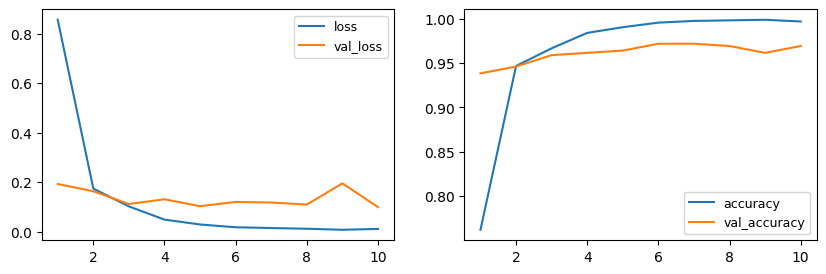

In [33]:
training_plot(['loss', 'accuracy'], history)

In [34]:
# Save in Keras 3 native format
model.save("model/model_tf.keras")

# Later, reload
reloaded_model = tf.keras.models.load_model("model/model_tf.keras")
